In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Historical Ethereum price behavior study:
The aim is to conduct a study on the behavior of Ethereum price quotes against the U.S. dollar. The objective is to obtain useful information on this topic, as well as to generate additional insights that will later contribute to creating an investment plan based on historical data.

## Dataset loading and initial visualization:
This dataset contains information about Ethereum trading from year 2018 to 2020. This includes columns like opening cost, closing cost, high value, low value and volume traded.

In [115]:
df = pd.read_csv('ETH_1h.csv')
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


## Initial Data Exploration:
### Exploring the dataset to get some general information about it:

In [106]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB
None
               Open          High           Low         Close        Volume
count  23674.000000  23674.000000  23674.000000  23674.000000  2.367400e+04
mean     324.933372    327.317109    322.255521    324.926601  2.011035e+06
std      236.189068    238.539115    233.365042    236.192308  3.673646e+06
min       81.290000     82.000000     80.600000     81.290000  0.000000e+00
25%      171.522500    172.472500    170.500000    171.512500  3.993914e+05
50%      229.745000    231.725000    228.10000

## Data cleaning:

### Identify duplicated data:

In [107]:
print(f"The data set has {df.duplicated().sum()} duplicate values.")

The data set has 0 duplicate values.


### Identifiy missing data:

In [108]:
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Convert the Date column to datetime:

In [109]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


### Remove rows where Volume == 0

In [110]:
condition = df['Volume'] == 0
df.drop(df[condition].index, inplace=True)

## Create new Features and aditional insights

In [111]:
# Create a 'Variation' and 'Variation_%' column (difference between the opening price and the closing price)
df['Variation'] = df['Close'] - df['Open']
df['Variation_%'] = df['Variation'] / df['Open'] * 100

# Create a 'direction' column for the candlestick (bullish or bearish)

def direction(variation):
    if variation > 0:
        return 'bullish'
    else:
        return 'bearish'
df['Direction'] = df['Variation'].map(direction)

# Create a 'DayOfWeek' column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Create a 'Range' column (difference betwen High and Low prices):
df['Range'] = df['High'] - df['Low']

# Creating a 'EMA_26' and 'EMA_13' columns (13 and 26 periods Exponencial Moving Average based on the closing prices)
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['EMA_13'] = df['Close'].ewm(span=13,adjust=False).mean()

# Creating a 'ATR_14' column (14 periods Average True Range)
df_atr = pd.DataFrame()
df_atr['TR1'] = df['High'] - df['Low']
df_atr['TR2'] = abs(df['High'] - df['Close'].shift(1))
df_atr['TR3'] = abs(df['Low'] - df['Close'].shift(1))
df_atr['TR'] = df_atr[['TR1', 'TR2', 'TR3']].max(axis=1)
atr_period = 26
df['ATR'] = df_atr['TR'].ewm(span=atr_period, adjust=False).mean()

# Creating 'ATR+3' and 'ATR-3' columns (the atr channels columns)
df['ATR+3'] = df['EMA_26'] + (df['ATR'] * 3)
df['ATR-3'] = df['EMA_26'] - (df['ATR'] * 3)

df.head(24)

,Date,Symbol,Open,High,Low,Close,Volume,Variation,Variation_%,Direction,DayOfWeek,Range,EMA_26,EMA_13,ATR,ATR+3,ATR-3
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,-1.23,-0.946591,bearish,Friday,4.95,128.710000,128.710000,4.950000,143.560000,113.860000
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,10.43,8.727303,bullish,Friday,14.92,128.801111,128.885714,5.688519,145.866667,111.735556
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,-4.96,-3.984896,bearish,Friday,9.35,128.112881,127.546327,6.336776,147.123210,109.102551
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,0.39,0.314313,bullish,Friday,5.79,127.843038,127.106851,6.453311,147.202972,108.483103
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,-0.77,-0.616740,bearish,Friday,9.34,127.564294,126.674444,6.667140,147.565715,107.562873
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00,-3.54,-2.757224,bearish,Friday,12.84,127.363235,126.413809,7.124389,148.736403,105.990068
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89,-5.64,-4.208013,bearish,Friday,12.40,127.439292,126.696122,7.563323,150.129262,104.749322
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93,2.68,2.040350,bullish,Friday,11.96,127.927493,127.743819,7.933447,151.727835,104.127150
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52,2.42,1.876988,bullish,Friday,7.65,128.181012,128.258988,7.912451,151.918366,104.443658
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29,-3.67,-2.767722,bearish,Friday,7.16,128.236492,128.354847,7.856714,151.806635,104.666350


### Create a Summary

In [112]:
# Price Variation summary

df_variation = df
df_variation['Variation'] = df_variation['Variation'].abs()

# Getting and sorting the price variation by day of the week
dayofweek_var = df_variation.groupby('DayOfWeek')['Variation'].mean()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_var.index = pd.CategoricalIndex(dayofweek_var.index, categories=ordered_days, ordered=True)
dayofweek_var.sort_index(inplace=True)

# Getting the price variation by day of the month
dayofmonth_var = df_variation.groupby(df_variation['Date'].dt.day)['Variation'].mean()

# Getting and sorting the monthly price variation
monthly_var = df_variation.groupby(df_variation['Date'].dt.month_name())['Variation'].mean()
ordered_months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_var.index = pd.CategoricalIndex(monthly_var.index, categories=ordered_months, ordered=True)
monthly_var.sort_index(inplace=True)


print(f"Price variation summary:")
print(f"The minimum price variation in one hour timeframe was: {df['Variation'].abs().min()} USD")
print(f"The maximum price variation in one hour timeframe was: {df['Variation'].abs().max()} USD")
print(f"The average price variation in one hour timeframe is: {df['Variation'].abs().mean()} USD")
print(f"The day of the week with the biggest average variation is: {dayofweek_var.idxmax()}")
print(f"The day of the week with the lowest average variation is: {dayofweek_var.idxmin()}")
print(f"The day of the month with the biggest average variation is: {dayofmonth_var.idxmax()}")
print(f"The day of the month with the lowest average variation is: {dayofmonth_var.idxmin()}")
print(f"The month with the biggest average variation is: {monthly_var.idxmax()}")
print(f"The month with the lowest average variation is: {monthly_var.idxmin()}")
print(f"The biggest price rise in one hour timeframe was: {df['Variation'].max()} USD")
print(f"The biggest price fall in one hour timeframe was: {df['Variation'].min()} USD")
print(f"The difference between the initial and final prices for the entire studied timeframe is: {df['Close'].iloc[-1] - df['Open'].iloc[0]} USD")
print("")

# Volume Summary

# Getting and sorting the traded volume by day of the week
dayofweek_vol = df.groupby('DayOfWeek')['Volume'].mean()
dayofweek_vol.index = pd.CategoricalIndex(dayofweek_vol.index, categories=ordered_days, ordered=True)
dayofweek_vol.sort_index(inplace=True)

# Getting and sorting the traded volume by day of the month
dayofmonth_vol = df.groupby(df['Date'].dt.day)['Volume'].mean()


# Getting and sorting the monthly traded volume
monthly_vol = df.groupby(df['Date'].dt.month_name())['Volume'].mean()
monthly_vol.index = pd.CategoricalIndex(monthly_vol.index, categories=ordered_months, ordered=True)
monthly_vol.sort_index(inplace=True)

print(f"Volume Summary:")
print(f"The minimum average traded volume was: {df['Volume'].min()} ETH")
print(f"The maximum average traded volume was: {df['Volume'].max()} ETH")
print(f"The average average traded volume in one hour timeframe was: {df['Volume'].mean()} USD")
print("")

# Bulls vs Bears
print("Bulls vs Bears Summary:")
print('Bulls:')
condition = df['Direction'] == 'bullish'
print(f"The total of bullish one hour timeframes was: {df[condition].shape[0]}")
condition = df['Variation'] > 0
print(f"The average price variation of bullish timeframes was: {df['Variation'][condition].mean()} USD")
condition = df['Direction'] == 'bearish'
print(f"The total of bearish one hour timeframes was: {df[condition].shape[0]}")
condition = df['Variation'] < 0
print(f"The average price variation of bearish timeframes was: {df['Variation'][condition].mean()} USD")

Price variation summary:
The minimum price variation in one hour timeframe was: 0.0 USD
The maximum price variation in one hour timeframe was: 135.74 USD
The average price variation in one hour timeframe is: 2.630051559462429 USD
The day of the week with the biggest average variation is: Tuesday
The day of the week with the lowest average variation is: Saturday
The day of the month with the biggest average variation is: 16
The day of the month with the lowest average variation is: 31
The month with the biggest average variation is: January
The month with the lowest average variation is: October
The biggest price rise in one hour timeframe was: 135.74 USD
The biggest price fall in one hour timeframe was: 0.0 USD
The difference between the initial and final prices for the entire studied timeframe is: 145.07 USD

Volume Summary:
The minimum average traded volume was: 114.1 ETH
The maximum average traded volume was: 85697897.38 ETH
The average average traded volume in one hour timeframe wa

### Visualizing Variation and Volume distribution

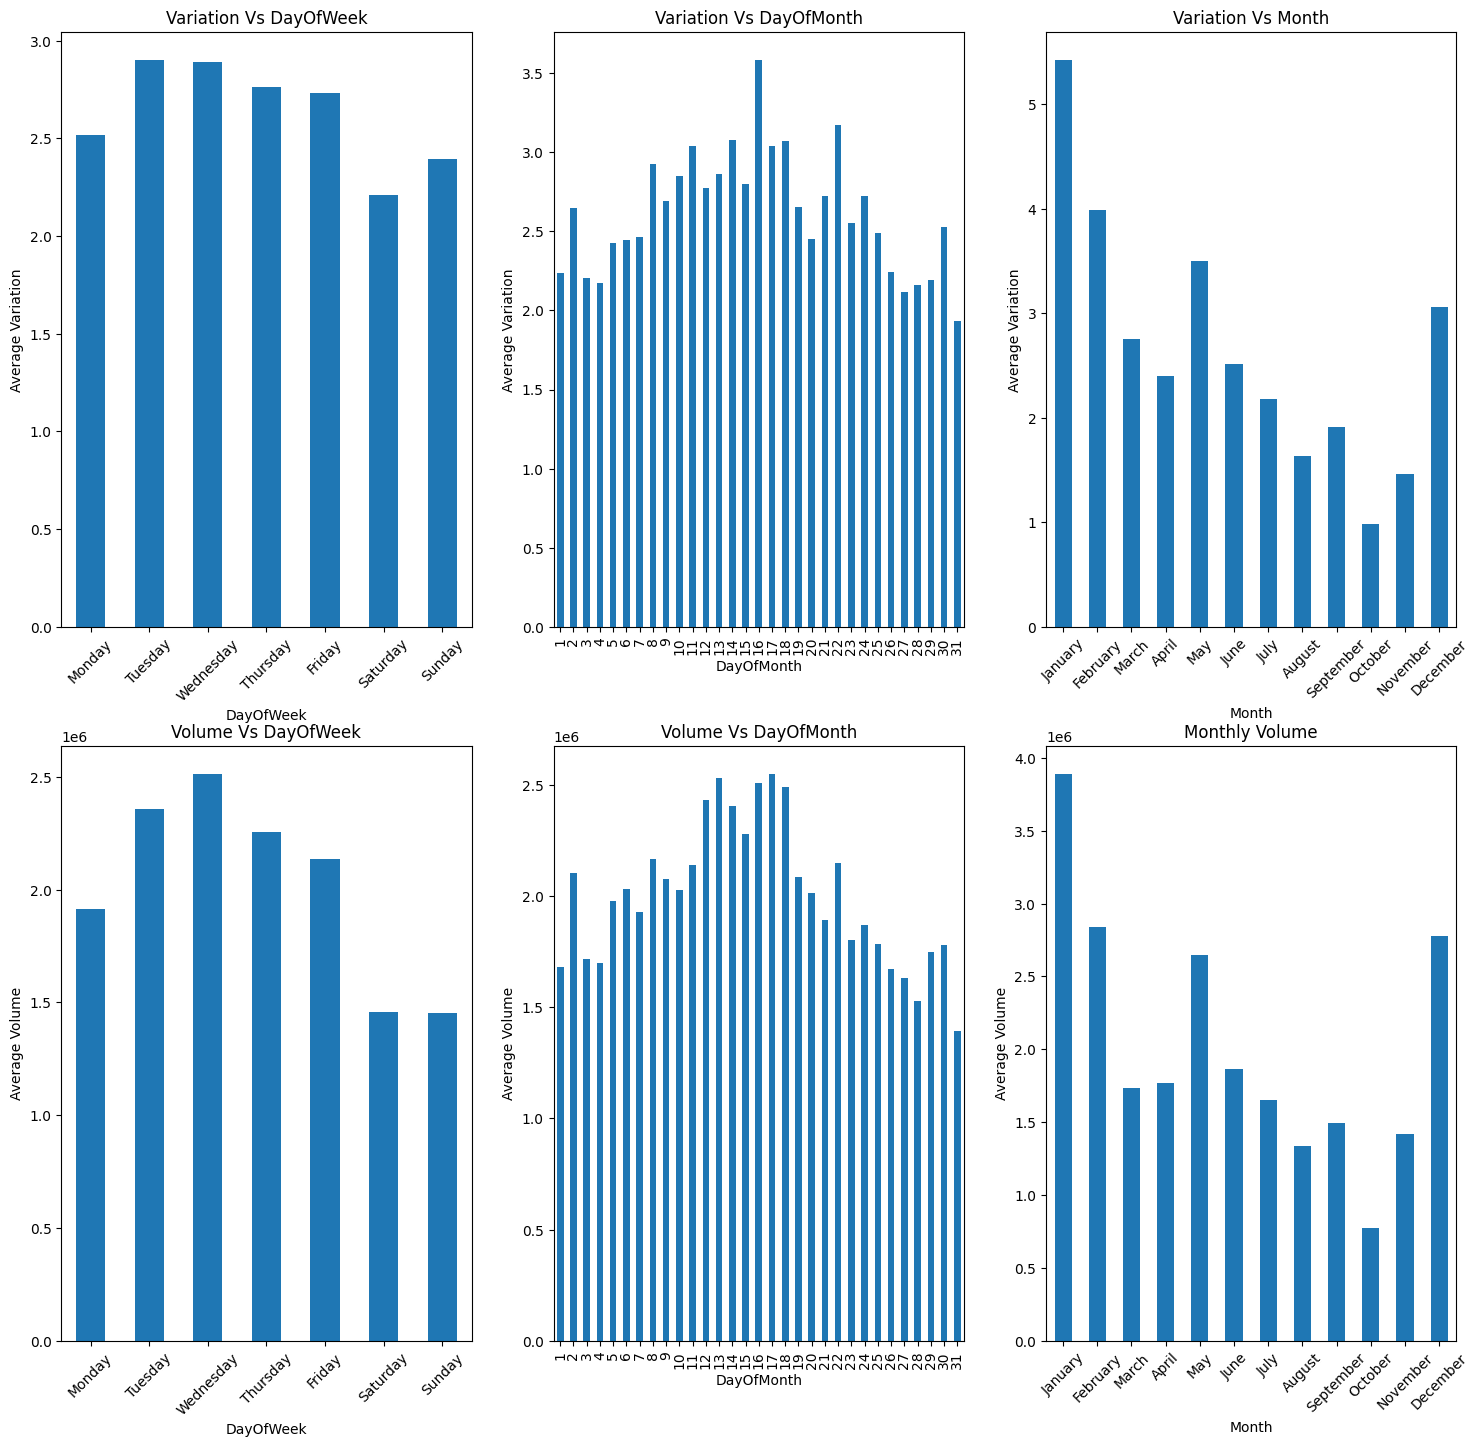

In [113]:

# Variation Vs DayOfWeek
plt.figure(figsize=(18,17))
plt.subplot(2,3,1)
dayofweek_var.plot(kind='bar')
plt.title('Variation Vs DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Average Variation')
plt.xticks(rotation=45)

# Variation Vs DayOfMonth
plt.subplot(2,3,2)
dayofmonth_var.plot(kind='bar')
plt.title('Variation Vs DayOfMonth')
plt.xlabel('DayOfMonth')
plt.ylabel('Average Variation')


# 'Variation Vs Month
plt.subplot(2,3,3)
monthly_var.plot(kind='bar')
plt.title('Variation Vs Month')
plt.xlabel('Month')
plt.ylabel('Average Variation')
plt.xticks(rotation=45)

# Volume Vs DayOfWeek
plt.subplot(2,3,4)
dayofweek_vol.plot(kind='bar')
plt.title('Volume Vs DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)

# Volume Vs DayOfMonth
plt.subplot(2,3,5)
dayofmonth_vol.plot(kind='bar')
plt.title('Volume Vs DayOfMonth')
plt.xlabel('DayOfMonth')
plt.ylabel('Average Volume')

# Monthly Volume
plt.subplot(2,3,6)
monthly_vol.plot(kind='bar')
plt.title('Monthly Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)

plt.show()


### Visualizing all the features that are going to be used for the future tecnical analysis

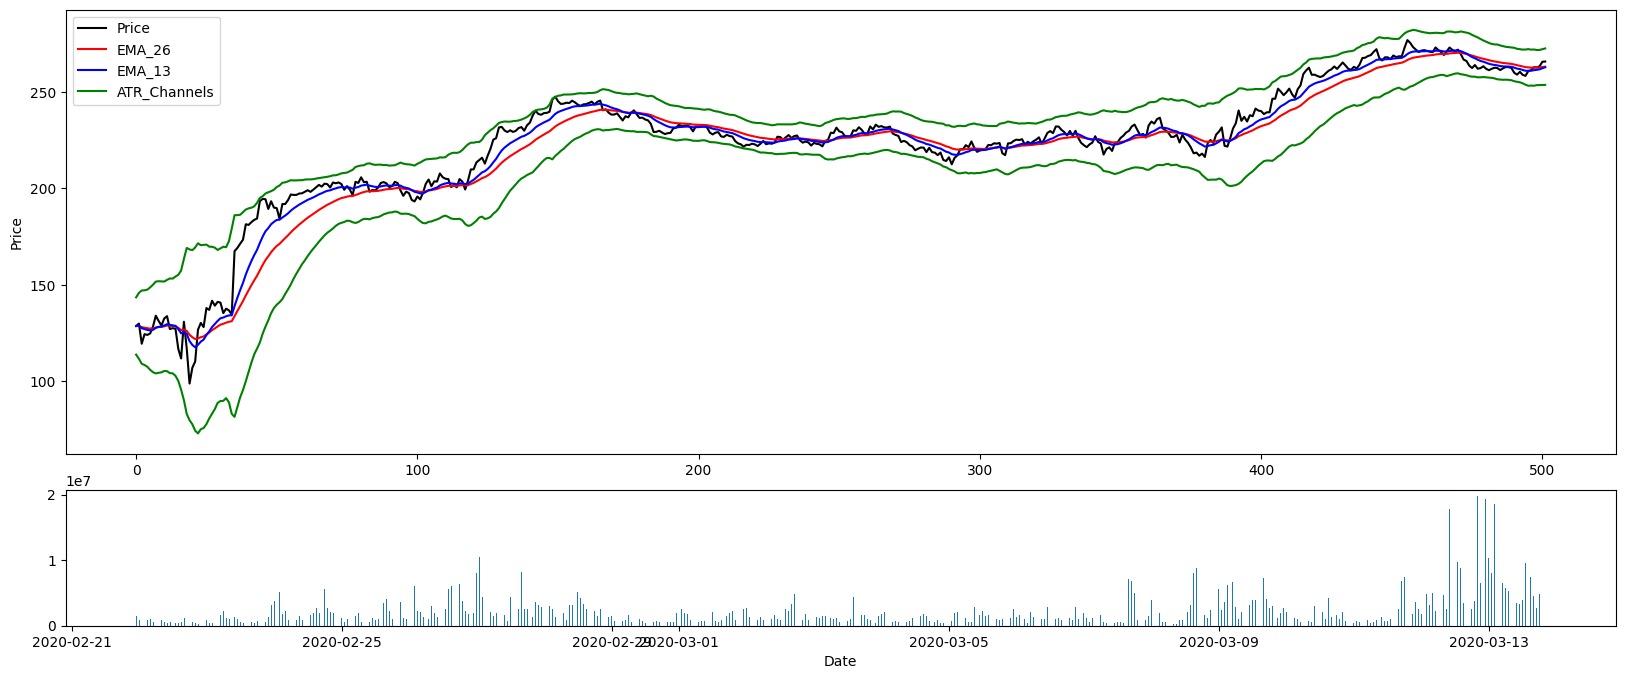

In [114]:
from matplotlib.gridspec import GridSpec

df1 = df.loc[:501]

# Creating a figure
fig = plt.figure(figsize=(20, 8))

# Defining el GridSpec
gs = GridSpec(3, 3, width_ratios=[1, 2, 1], height_ratios=[1, 2, 1])
ax1 = plt.subplot(gs[0:2,0:3]) 
ax2 = plt.subplot(gs[2, :])

# Adjust subplots sizes
ax1.plot(df1['Close'],color='black',label='Price')
ax1.plot(df1['EMA_26'],color='red',label='EMA_26')
ax1.plot(df1['EMA_13'],color='blue',label='EMA_13')
ax1.plot(df1['ATR+3'],color='green',label='ATR_Channels')
ax1.plot(df1['ATR-3'],color='green')
ax1.legend() 
ax1.set_ylabel('Price')
ax2.bar(df1['Date'], df1['Volume'], width=0.01)
ax2.set_xlabel('Date')


# Show the chart
plt.show()